In [1]:
import pandas as pd
data = pd.read_csv("train_age_dataset.csv")

In [2]:
data.isna().sum()

Unnamed: 0                         0
userId                             0
tier                               0
gender                             0
following_rate                     0
followers_avg_age                  0
following_avg_age                  0
max_repetitive_punc                0
num_of_hashtags_per_action         0
emoji_count_per_action             0
punctuations_per_action            0
number_of_words_per_action         0
avgCompletion                      0
avgTimeSpent                       0
avgDuration                        0
avgComments                        0
creations                          0
content_views                      0
num_of_comments                    0
weekends_trails_watched_per_day    0
weekdays_trails_watched_per_day    0
slot1_trails_watched_per_day       0
slot2_trails_watched_per_day       0
slot3_trails_watched_per_day       0
slot4_trails_watched_per_day       0
avgt2                              0
age_group                          0
d

In [8]:
for column in data.columns:
    print(column)
    print(data[column].value_counts())

Unnamed: 0
2047      1
208079    1
214210    1
216259    1
226500    1
         ..
519080    1
517033    1
523178    1
521131    1
0         1
Name: Unnamed: 0, Length: 488877, dtype: int64
userId
40898558    1
2568778     1
55900723    1
56200957    1
46453302    1
           ..
52767072    1
49727374    1
37107600    1
47581078    1
44044290    1
Name: userId, Length: 488877, dtype: int64
tier
2    397890
1     51511
3     39476
Name: tier, dtype: int64
gender
1    384728
2    104149
Name: gender, dtype: int64
following_rate
0.000000    310647
0.008000      5217
0.007937      3827
0.008130      3284
0.008197      2880
             ...  
0.006640         1
0.412371         1
0.213333         1
1.640000         1
0.204120         1
Name: following_rate, Length: 15453, dtype: int64
followers_avg_age
0.000000    406543
2.000000     15724
1.000000      7734
3.000000      7446
1.500000      4342
             ...  
2.072119         1
1.916049         1
2.186813         1
1.880435         1


In [12]:
data.columns

Index(['Unnamed: 0', 'userId', 'tier', 'gender', 'following_rate',
       'followers_avg_age', 'following_avg_age', 'max_repetitive_punc',
       'num_of_hashtags_per_action', 'emoji_count_per_action',
       'punctuations_per_action', 'number_of_words_per_action',
       'avgCompletion', 'avgTimeSpent', 'avgDuration', 'avgComments',
       'creations', 'content_views', 'num_of_comments',
       'weekends_trails_watched_per_day', 'weekdays_trails_watched_per_day',
       'slot1_trails_watched_per_day', 'slot2_trails_watched_per_day',
       'slot3_trails_watched_per_day', 'slot4_trails_watched_per_day', 'avgt2',
       'age_group'],
      dtype='object')

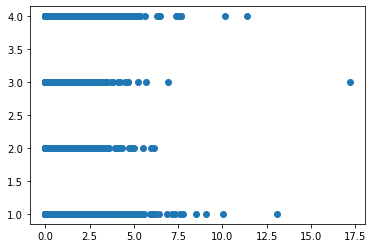

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
column = "weekends_trails_watched_per_day"
plt.scatter(data[column],data["age_group"])


Index([], dtype='object')

In [28]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


In [23]:
x_train,x_test,y_train,y_test = train_test_split(data[data.columns[2:-1]],data[data.columns[-1]], test_size = 0.2, random_state=2020)

In [31]:
model = xgb.XGBClassifier()
#model = RandomForestClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [32]:
y_pred = model.predict(x_test)
f1_score(y_test,y_pred, average = 'weighted')

0.7497476913036579

In [37]:
data_pred = pd.read_csv("test_age_dataset.csv")
y = model.predict(data_pred[data.columns[2:-1]])
pred = pd.DataFrame(data=y, index = None, columns = ["prediction"])
pred.to_csv("pred.csv", index = False)